In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS


## SCRAPING PAGE DATA

In [15]:
reviews  = []
stars = []
date = []
country = []
recomended = []

In [16]:
for p in range(1,43):
    page = requests.get(f"https://www.airlinequality.com/airline-reviews/condor-airlines/page/{p}/")
    
    soup = BeautifulSoup(page.content, 'html.parser')
    
    for item in soup.find_all("div", class_="text_content"):
        reviews.append(item.text)
    
    for item in soup.find_all("div", class_ = "rating-10"):
        try:
            stars.append(item.span.text.strip())
        except:
            print(f"Error on page {p}")
            stars.append("None")
            
    for item in soup.find_all("time"):
        date.append(item.text)
        
    for item in soup.find_all("h3"):
        country.append(item.span.next_sibling.text.strip(" ()"))
    
    for item in soup.find_all(class_ ="review-rating-header recommended"):
        recomended.append(item.next_sibling.text)
        

Error on page 30
Error on page 30
Error on page 30
Error on page 32
Error on page 32
Error on page 33
Error on page 33
Error on page 33
Error on page 33
Error on page 33
Error on page 34
Error on page 35
Error on page 36
Error on page 36
Error on page 36
Error on page 41
Error on page 42
Error on page 42


In [17]:
print(len(reviews))
print(len(country))
print(len(date))
print(len(recomended))
print(len(stars))

420
420
420
420
462


In [18]:
stars= stars[:420]

In [19]:
df = pd.DataFrame({"reviews":reviews,"stars": stars, "date":date, "country": country, "recomended":recomended})

In [20]:
df

,reviews,stars,date,country,recomended
0,✅ Trip Verified | I am disappointed with Cond...,4,29th June 2023,Lithuania,no
1,✅ Trip Verified | Very pleasant experience! Th...,2,27th June 2023,Switzerland,yes
2,✅ Trip Verified | What a pleasant surprise. M...,9,23rd June 2023,South Africa,yes
3,Not Verified | I flew on Condor not by choice...,7,20th June 2023,Canada,no
4,"✅ Trip Verified | Apparently, I was flagged f...",2,17th June 2023,United States,no
...,...,...,...,...,...
415,FRA-AYT-FRA: Check-in at 4 am was a mess and h...,2,3rd June 2011,Germany,yes
416,First time I fly with Condor (Comfort Cabin) a...,1,21st May 2011,United States,no
417,We flew Condor from Frankfurt to Ft. Lauderdal...,10,18th May 2011,United States,no
418,DUS-LPA. Upgrade to Premium cabin very comfort...,4,26th April 2011,Canada,yes


## CLEANING AND MANIPULATING THE DATA

In [21]:
df["Verified"] = df.reviews.str.contains("Trip Verified")

In [22]:
df.head()

,reviews,stars,date,country,recomended,Verified
0,✅ Trip Verified | I am disappointed with Cond...,4,29th June 2023,Lithuania,no,True
1,✅ Trip Verified | Very pleasant experience! Th...,2,27th June 2023,Switzerland,yes,True
2,✅ Trip Verified | What a pleasant surprise. M...,9,23rd June 2023,South Africa,yes,True
3,Not Verified | I flew on Condor not by choice...,7,20th June 2023,Canada,no,False
4,"✅ Trip Verified | Apparently, I was flagged f...",2,17th June 2023,United States,no,True


In [23]:
df["cleanReview"] = df.loc[:, 'reviews'].apply(lambda x: re.sub(r'[^\w\s]', '', x.lower()).strip().replace("trip verified", "").replace("not verified", ""))

In [24]:
df.head()

,reviews,stars,date,country,recomended,Verified,cleanReview
0,✅ Trip Verified | I am disappointed with Cond...,4,29th June 2023,Lithuania,no,True,i am disappointed with condors services i w...
1,✅ Trip Verified | Very pleasant experience! Th...,2,27th June 2023,Switzerland,yes,True,very pleasant experience there was a delay f...
2,✅ Trip Verified | What a pleasant surprise. M...,9,23rd June 2023,South Africa,yes,True,what a pleasant surprise my first time on c...
3,Not Verified | I flew on Condor not by choice...,7,20th June 2023,Canada,no,False,i flew on condor not by choice but because ...
4,"✅ Trip Verified | Apparently, I was flagged f...",2,17th June 2023,United States,no,True,apparently i was flagged for an extra secur...


In [25]:
df.date = pd.to_datetime(df.date)

In [26]:
df["Year"] = df["date"].dt.year

In [27]:
# drop the rows where the value of ratings is None
df.drop(df[df.stars == "None"].index, axis=0, inplace=True)
df["stars"]=df["stars"].astype(int)
df.stars.unique()


array([ 4,  2,  9,  7,  1,  3,  8, 10,  5,  6])

In [28]:
df.isnull().value_counts()

reviews  stars  date   country  recomended  Verified  cleanReview  Year 
False    False  False  False    False       False     False        False    405
dtype: int64

In [29]:
df.head()

,reviews,stars,date,country,recomended,Verified,cleanReview,Year
0,✅ Trip Verified | I am disappointed with Cond...,4,2023-06-29,Lithuania,no,True,i am disappointed with condors services i w...,2023
1,✅ Trip Verified | Very pleasant experience! Th...,2,2023-06-27,Switzerland,yes,True,very pleasant experience there was a delay f...,2023
2,✅ Trip Verified | What a pleasant surprise. M...,9,2023-06-23,South Africa,yes,True,what a pleasant surprise my first time on c...,2023
3,Not Verified | I flew on Condor not by choice...,7,2023-06-20,Canada,no,False,i flew on condor not by choice but because ...,2023
4,"✅ Trip Verified | Apparently, I was flagged f...",2,2023-06-17,United States,no,True,apparently i was flagged for an extra secur...,2023


## DATA VISUALIZATION  

##### Average rating

In [109]:
df.stars.mean()

3.6148148148148147

##### Total count for each ratings

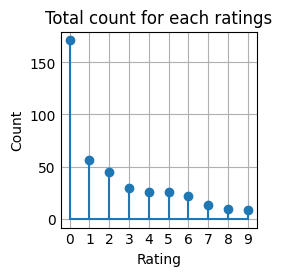

In [123]:
plt.stem(df.stars.value_counts())
plt.xticks(range(len(df.stars.value_counts().index)))
plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Total count for each ratings")
plt.show()

#### Number of Reviews by country (TOP 5)

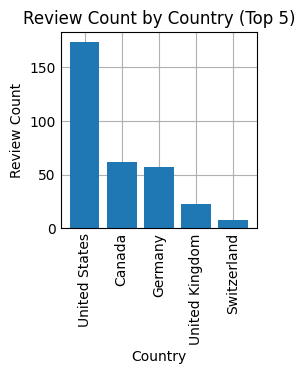

In [148]:
country_reviews = df.groupby('country')['reviews'].count()
sorted_countries = country_reviews.sort_values(ascending=False)
top_countries = sorted_countries[:5]
countries = top_countries.index
review_counts = top_countries.values
plt.bar(countries, review_counts)
plt.xlabel('Country')
plt.ylabel('Review Count')
plt.title('Review Count by Country (Top 5)')
plt.xticks(rotation=90)  
plt.show()

##### most used words in revews

In [ ]:
import nltk
from nltk.corpus import stopwords

reviews = " ".join(df.cleanReview)
plt.figure(figsize=(20,10))

stopwords = set(stopwords.words('english'))
stopwords.update(["ba","flight", "british","airway", "airline","plane", "told","also","passenger" \
                 "london", "heathrow", "aircraft", "could","even", "would"])
wordcloud = WordCloud(height=500,width=500,max_font_size=100, max_words=300, stopwords=stopwords).generate(reviews)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


##### Top 10 Countries giving highest rating 

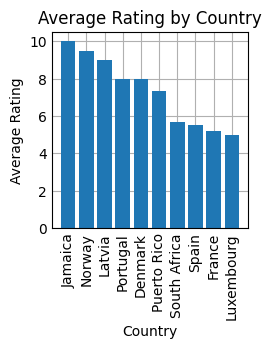

In [166]:
country_rating = df.groupby('country')['stars'].mean()
sorted_countries = country_rating.sort_values(ascending=False)
top_countries = sorted_countries[:10]
countries = top_countries.index
review_counts = top_countries.values
plt.bar(countries, review_counts)
plt.xticks(rotation=90)  
plt.xlabel('Country')
plt.ylabel('Average Rating')
plt.title('Average Rating by Country')
plt.show()

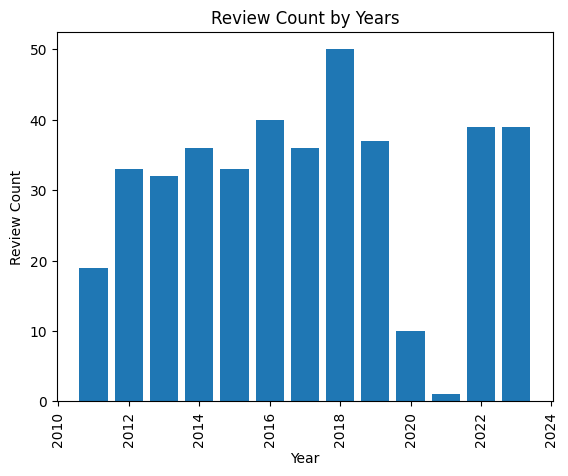

In [34]:
year = df.groupby('Year')['reviews'].count()
sorted_year = year.sort_values(ascending=False)
top_years = sorted_year
years = top_years.index
counts = top_years.values
plt.bar(years, counts)
plt.xlabel('Year')
plt.ylabel('Review Count')
plt.title('Review Count by Years')
plt.xticks(rotation=90)  
plt.show()